<p style="font-family:Verdana; font-size: 26px; color: cyan"> 0 Disease Prediction Using Machine Learning</p>

In [1]:
# Disease prediction using machine learning is used in healthcare 
# to provide accurate and early diagnosis based on patient symptoms.

<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 1: Import Libraries</p>

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

<p style="font-family:Verdana; font-size: 20px; color: orange"> 2. Step 2: Reading the dataset</p>

In [3]:
# In this step we load the dataset and encode disease labels into numbers 
# and visualize class distribution to check for imbalance.
df = pd.read_csv('../../data/improved_disease_dataset.csv')
encoder = LabelEncoder()
df["disease"] = encoder.fit_transform(df["disease"])

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [4]:
# use RandomOverSampler to balance the dataset by duplicating minority classes 
# and ensuring all diseases have equal samples for fair and effective model training.
from imblearn.over_sampling import RandomOverSampler

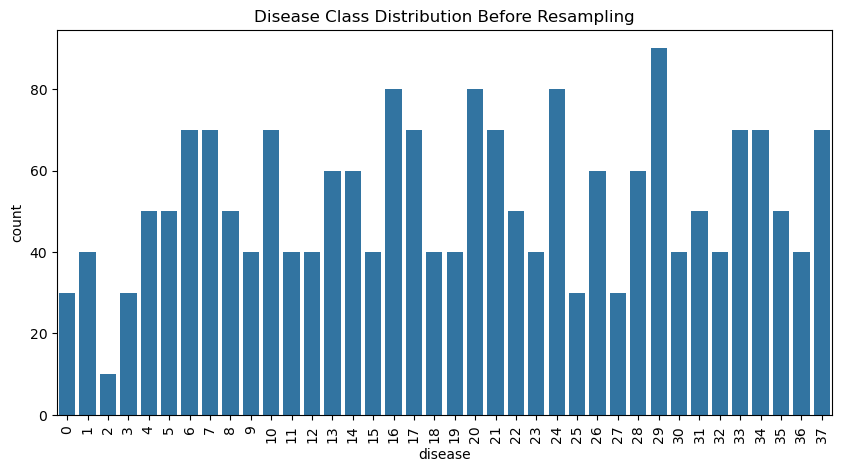

Resampled Class Distribution:
 disease
29    90
11    90
4     90
18    90
23    90
1     90
12    90
30    90
32    90
9     90
20    90
36    90
15    90
19    90
27    90
3     90
25    90
0     90
5     90
22    90
35    90
31    90
16    90
24    90
7     90
17    90
34    90
10    90
37    90
6     90
33    90
21    90
26    90
13    90
28    90
14    90
8     90
2     90
Name: count, dtype: int64


In [6]:
plt.figure(figsize=(10, 5))
sns.countplot(x=y)
plt.title("Disease Class Distribution Before Resampling")
plt.xticks(rotation=90)
plt.show()

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

print("Resampled Class Distribution:\n", pd.Series(y_resampled).value_counts())

<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 3: Cross-Validation with Stratified K-Fold</p>

> We use Stratified K-Fold Cross-Validation to evaluate three machine learning models. 

In [8]:
# Stratified K-Fold Cross Validation is a technique used for evaluating a model. 
# It is particularly useful for classification problems in which the class labels 
# are not evenly distributed i.e data is imbalanced.
if 'gender' in X_resampled.columns:
    le = LabelEncoder()
    X_resampled['gender'] = le.fit_transform(X_resampled['gender'])

X_resampled = X_resampled.fillna(0)

if len(y_resampled.shape) > 1:
    # In NumPy, both ravel() and flatten() functions 
    # are used to convert a multi-dimensional array into a one-dimensional array
     
    y_resampled = y_resampled.values.ravel()


In [9]:
from sklearn.tree import DecisionTreeClassifier

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [10]:

from sklearn.model_selection import StratifiedKFold

cv_scoring = 'accuracy'  # you can also use 'f1_weighted', 'roc_auc_ovr' for multi-class
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [11]:
for model_name, model in models.items():
    try:
        scores = cross_val_score(
            model,
            X_resampled,
            y_resampled,
            cv=stratified_kfold,
            scoring=cv_scoring,
            n_jobs=-1,
            error_score='raise' 
        )
        print("=" * 50)
        print(f"Model: {model_name}")
        print(f"Scores: {scores}")
        print(f"Mean Accuracy: {scores.mean():.4f}")
    except Exception as e:
        print("=" * 50)
        print(f"Model: {model_name} failed with error:")
        print(e)

Model: Decision Tree
Scores: [0.5497076  0.54532164 0.53508772 0.53654971 0.52631579]
Mean Accuracy: 0.5386
Model: Random Forest
Scores: [0.54678363 0.54532164 0.55116959 0.53947368 0.53216374]
Mean Accuracy: 0.5430


In [12]:
# The output shows the evaluation results for three models SVC, Gaussian Naive Bayes and Random Forest using cross-validation. 
# Each model has two accuracy scores: 1.0 and approximately 0.976 indicating consistently high performance across all folds.

<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 4: Training Individual Models</p>

In [16]:
# After evaluating the models using cross-validation we train them on the resampled dataset  

In [17]:
# Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks.
svm_model = SVC()
svm_model.fit(X_resampled, y_resampled)
svm_preds = svm_model.predict(X_resampled)

print(f"SVM Accuracy: {accuracy_score(y_resampled, svm_preds) * 100:.2f}%")

SVM Accuracy: 60.53%


In [18]:
# Gaussian Naive Bayes is a type of Naive Bayes method working on continuous attributes 
# and the data features that follows Gaussian distribution throughout the dataset.
nb_model = GaussianNB()
nb_model.fit(X_resampled, y_resampled)
nb_preds = nb_model.predict(X_resampled)

print(f"Naive Bayes Accuracy: {accuracy_score(y_resampled, nb_preds) * 100:.2f}%")

Naive Bayes Accuracy: 37.98%


In [24]:
# Random Forest is a method that combines the predictions of multiple decision trees 
# to produce a more accurate and stable result. 
# It can be used for both classification and regression tasks.
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, y_resampled)
rf_preds = rf_model.predict(X_resampled)

print(f"Random Forest Accuracy: {accuracy_score(y_resampled, rf_preds) * 100:.2f}%")

Random Forest Accuracy: 68.98%


<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 5: Combining Predictions for Robustness</p>

In [21]:
from statistics import mode
# mode: Return the most common data point from discrete or nominal data.
final_preds = [mode([i, j, k]) for i, j, k in zip(svm_preds, nb_preds, rf_preds)]

print(f"Combined Model Accuracy: {accuracy_score(y_resampled, final_preds) * 100:.2f}%")

Combined Model Accuracy: 60.64%


<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 6: Creating Prediction Function</p>

> Finally, we create a function that takes symptoms as input and predicts the disease using the combined model.

In [22]:
symptoms = X.columns.values
symptom_index = {symptom: idx for idx, symptom in enumerate(symptoms)}

def predict_disease(input_symptoms):
    input_symptoms = input_symptoms.split(",")
    input_data = [0] * len(symptom_index)
    
    for symptom in input_symptoms:
        if symptom in symptom_index:
            input_data[symptom_index[symptom]] = 1
    
    input_data = np.array(input_data).reshape(1, -1)

    rf_pred = encoder.classes_[rf_model.predict(input_data)[0]]
    nb_pred = encoder.classes_[nb_model.predict(input_data)[0]]
    svm_pred = encoder.classes_[svm_model.predict(input_data)[0]]

    final_pred = mode([rf_pred, nb_pred, svm_pred])
    
    return {
        "Random Forest Prediction": rf_pred,
        "Naive Bayes Prediction": nb_pred,
        "SVM Prediction": svm_pred,
        "Final Prediction": final_pred
    }

print(predict_disease("Itching,Skin Rash,Nodal Skin Eruptions"))

{'Random Forest Prediction': 'Heart attack', 'Naive Bayes Prediction': 'Urinary tract infection', 'SVM Prediction': 'Impetigo', 'Final Prediction': 'Heart attack'}


c:\Users\38067\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\38067\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Users\38067\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


> <p style="font-family:Verdana; font-size: 20px; color: orange"> {'Random Forest Prediction': 'Heart attack'}</p>

> <p style="font-family:Verdana; font-size: 20px; color: orange"> {'Naive Bayes Prediction': 'Urinary tract infection' }</p>

> <p style="font-family:Verdana; font-size: 20px; color: orange"> {'SVM Prediction': 'Impetigo' }</p>

> <p style="font-family:Verdana; font-size: 20px; color: orange"> {'Final Prediction': 'Heart attack'}</p>